In [1]:
import pandas as pd
import os.path as osp
import numpy as np
from mtools.plot_preamble import *

def load_data(file_path):
    store = pd.HDFStore(file_path, mode='r')
    all_df = store.get('all_imu')
    store.close()
    return all_df

filepath_list = [
    'handheld/data1_1',
    'handbag/data1_1',
    'pocket/data1_1',
    'trolley/data1_1'
]

domains = ['handheld', 'pocket', 'handbag', 'trolley']

dfs = [load_data(osp.join('../data/OxIOD_h5', file_path, 'data.h5')) for file_path in filepath_list]

In [2]:
from mtools import list_find, list_ind
all_domains = [trip.split('/')[0] for trip in filepath_list] 
domain_inds_list = [list_find(all_domains, domain) for domain in domains]
print(domain_inds_list)

for domain_inds in domain_inds_list:
    df = pd.concat(list_ind(dfs, domain_inds))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    mus = np.mean(df[['AccX', 'AccY', 'AccZ', 'AccM']].values, axis=0)
    sigmas = np.std(df[['AccX', 'AccY', 'AccZ', 'AccM']].values-mus, axis=0)
    print(mus, sigmas)

[[0], [1], [2], [3]]
[0.002073 0.018916 -0.007106 0.117102] [0.058415 0.075923 0.078687 0.045475]
[0.006629 -0.010139 0.002584 0.139886] [0.074177 0.135116 0.053131 0.084656]
[-0.030613 0.000949 0.053393 0.284799] [0.171332 0.234551 0.186626 0.204638]
[-0.000095 -0.001994 0.003555 0.061157] [0.033651 0.041200 0.044146 0.032484]


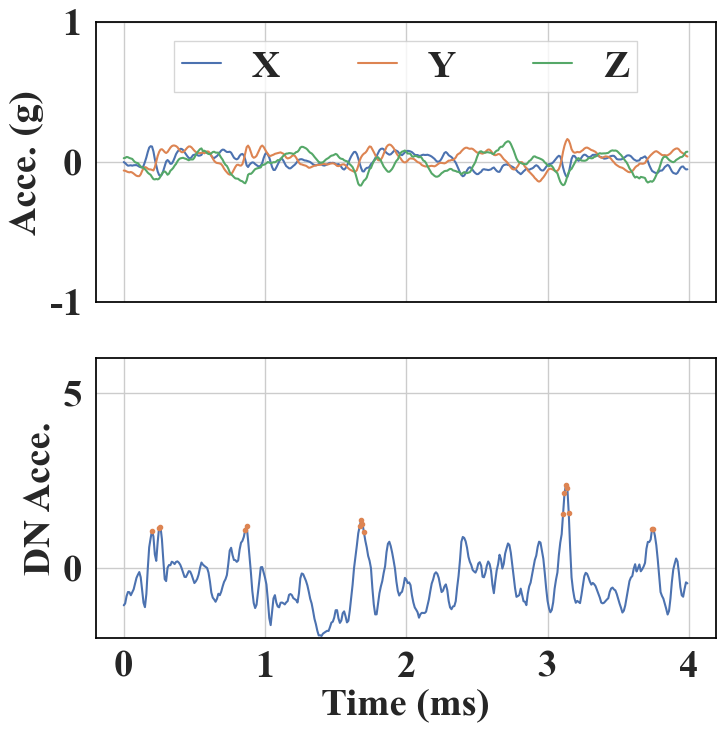

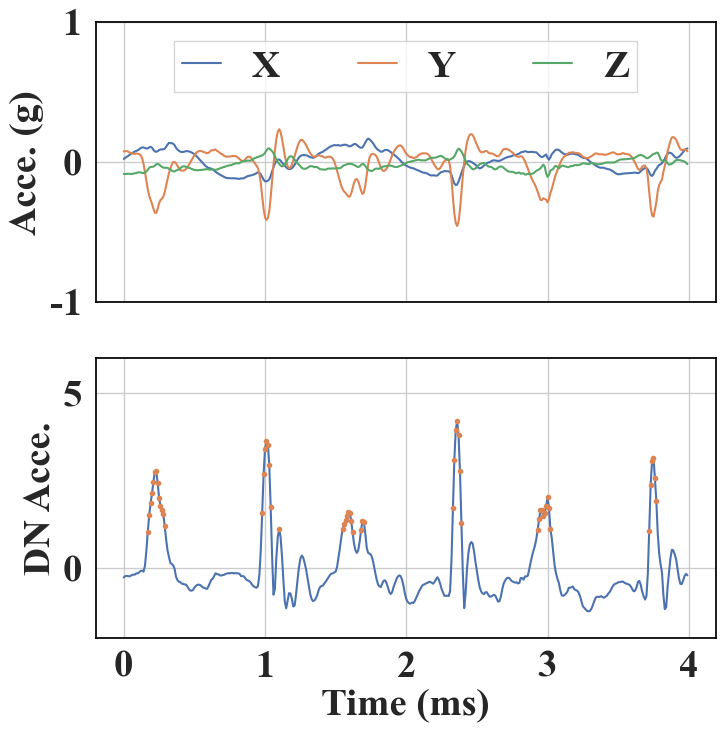

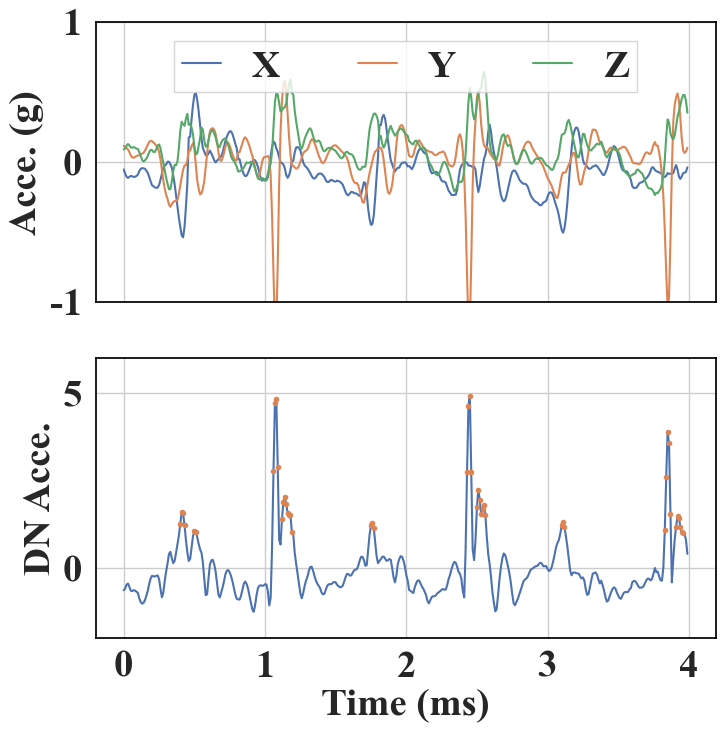

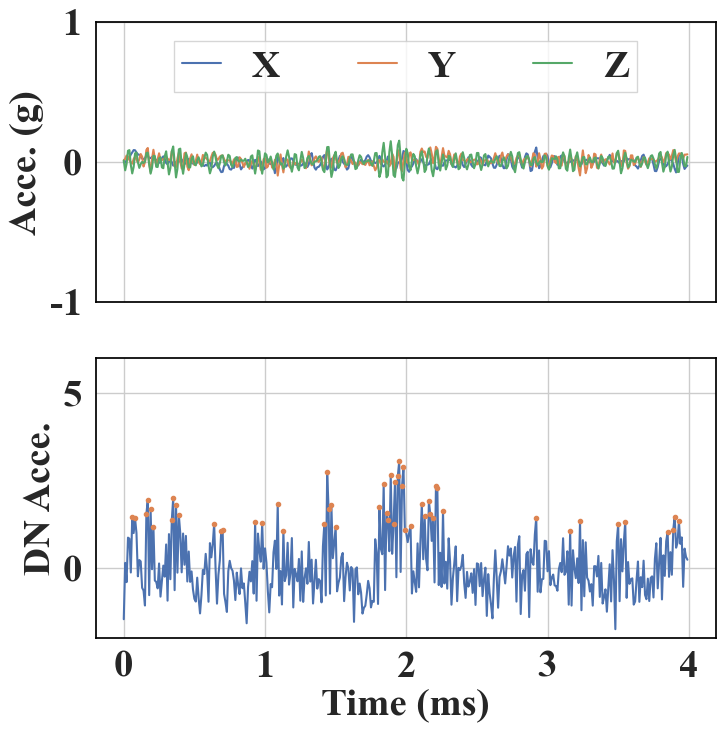

In [2]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(28)

def plot_imu(df, domain):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    plt.figure(2, [8, 8])
    plt.subplot(2, 1, 1)
    plt.plot(time_x, plot_df['AccX'], label='AccX')
    plt.plot(time_x, plot_df['AccY'], label='AccY')
    plt.plot(time_x, plot_df['AccZ'], label='AccZ')
    plt.xlabel('', fontdict=fontdict)
    plt.ylabel('Acce. (g)', fontdict=fontdict)
    plt.ylim([-1.0, 1.0])
    plt.legend(['X', 'Y', 'Z'], loc='upper center', handlelength=1.0, frameon=True, fancybox=False, borderpad=0.2, ncol=3)
    plt.title('')
    plt.xticks(range(5), labels=[''] * 5)
    plt.subplot(2, 1, 2)    
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('DN Acce.', fontdict=fontdict)
    # plt.legend(['X', 'Y', 'Z'], loc='upper right')
    plt.ylim([-2, 6])
    plt.show()

for df,domain in zip(dfs, domains):
    plot_imu(df, domain)


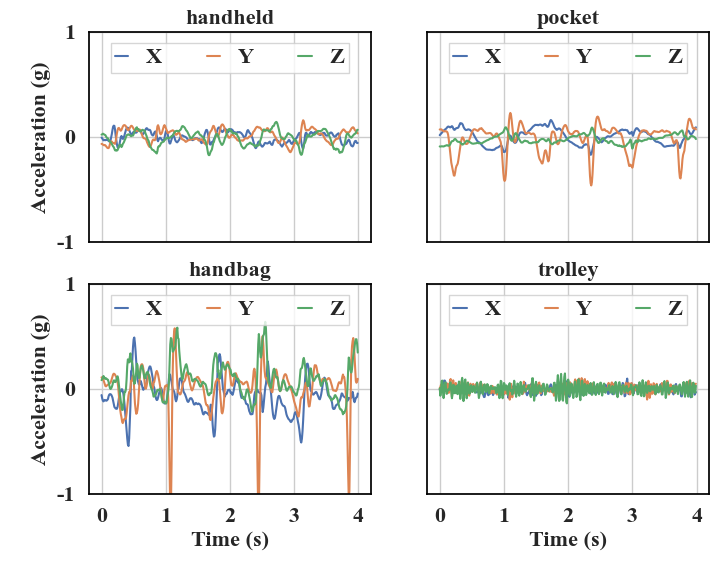

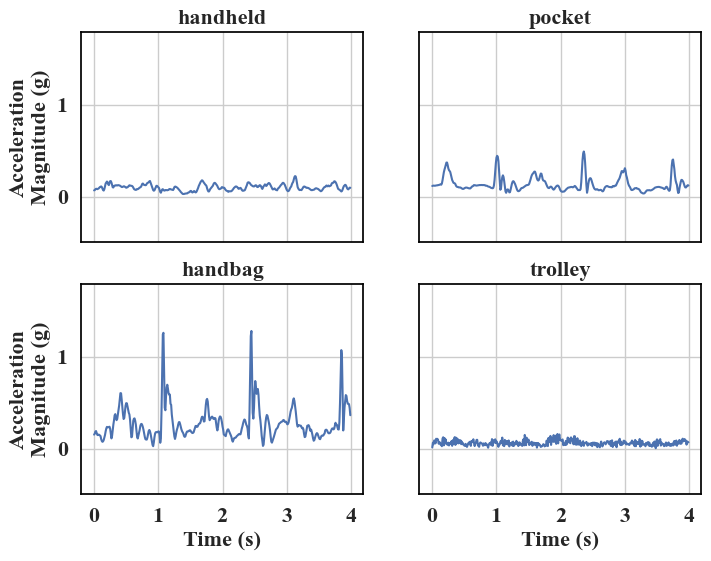

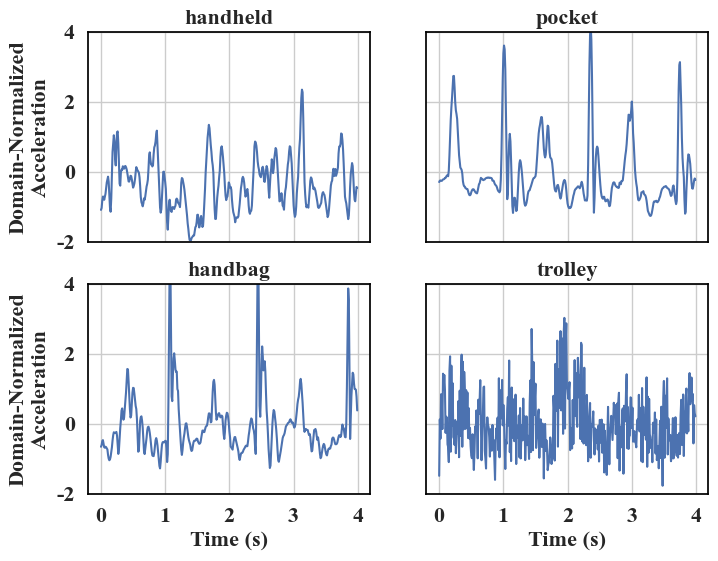

In [10]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, plot_type, i):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    
    if plot_type == 'Acc':
        plt.plot(time_x, plot_df['AccX'], label='AccX')
        plt.plot(time_x, plot_df['AccY'], label='AccY')
        plt.plot(time_x, plot_df['AccZ'], label='AccZ')
        
        plt.title(domain, fontdict=fontdict)
        if i%2==0 :
            plt.ylabel('\nAcceleration (g)', fontdict=fontdict)
            plt.yticks([-1, 0, 1]) # , labels=[''] * 5
        else:
            plt.ylabel('', fontdict=fontdict)
            plt.yticks([-1, 0, 1], labels=[''] * 3) # 
        plt.ylim([-1.0, 1.0])
        if i>=2:
            plt.xlabel('Time (s)', fontdict=fontdict)
            plt.xticks(range(5)) # , labels=[''] * 5
        else:
            plt.xticks(range(5), labels=[''] * 5) #
        plt.legend(['X', 'Y', 'Z'], loc='upper center', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2, ncol=3) 
    else:
        if plot_type == 'AccM':
            plt.plot(time_x, plot_df['AccM'], label='AccM')
        else:
            plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='AccNM')
        # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
        plt.title(domain, fontdict=fontdict)
        yticks= [-1, 0, 1, 2] if plot_type == 'AccM' else [-2, 0, 2, 4]
        if i%2==0 :
            plt.ylabel('Acceleration\nMagnitude (g)' if plot_type == 'AccM' else 'Domain-Normalized\nAcceleration', fontdict=fontdict)
            plt.yticks(yticks) # , labels=[''] * 5
        else:
            plt.ylabel('', fontdict=fontdict)
            plt.yticks(yticks, labels=[''] * len(yticks)) # 
        
        if i>=2:
            plt.xlabel('Time (s)', fontdict=fontdict)
            plt.xticks(range(5)) # , labels=[''] * 5
        else:
            plt.xticks(range(5), labels=[''] * 5)
        plt.ylim([-0.5, 1.8] if plot_type == 'AccM' else [-2.0, 4.0])
    

plt.figure(4, [8, 6])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plt.subplot(2, 2, i+1)
    plot_imu(df, domain, 'Acc', i)
save_pltfig(f'figures/imu_acc')
plt.show()


plt.figure(4, [8, 6])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plt.subplot(2, 2, i+1)
    plot_imu(df, domain, 'AccM', i)
save_pltfig(f'figures/imu_accm')
plt.show()


plt.figure(4, [8, 6])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plt.subplot(2, 2, i+1)
    plot_imu(df, domain, 'AccNM', i)
save_pltfig(f'figures/imu_accnm')
plt.show()

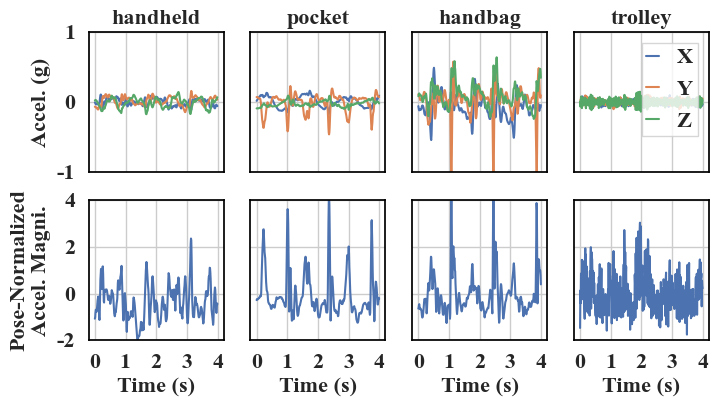

In [4]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, i):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    
    plt.subplot(2, 4, i+1)
    plt.plot(time_x, plot_df['AccX'], label='AccX')
    plt.plot(time_x, plot_df['AccY'], label='AccY')
    plt.plot(time_x, plot_df['AccZ'], label='AccZ')
    
    plt.title(domain, fontdict=fontdict)
    if i==0 :
        plt.ylabel('\nAccel. (g)', fontdict=fontdict)
        plt.yticks([-1, 0, 1]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-1, 0, 1], labels=[''] * 3) # 
    plt.ylim([-1.0, 1.0])
    plt.xticks(range(5), labels=[''] * 5) #
    if i==3:
        plt.legend(['X', 'Y', 'Z'], loc='upper right', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2) 
    
    plt.subplot(2, 4, i+5)
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    if i==0:
        plt.ylabel('Pose-Normalized\nAccel. Magni.', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
    
    plt.xlabel('Time (s)', fontdict=fontdict)
    plt.xticks(range(5)) # , labels=[''] * 5
    plt.ylim([-2.0, 4.0])
    

plt.figure(8, [8, 4])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plot_imu(df, domain, i)
save_pltfig(f'figures/imu_acc_accm')
plt.show()

In [32]:
dfs[0].columns

Index(['time', 'rollDeg', 'pitchDeg', 'yawDeg', 'GysX', 'GysY', 'GysZ', 'GraX', 'GraY', 'GraZ', 'AccX', 'AccY', 'AccZ', 'MagX', 'MagY', 'MagZ', 'AccE', 'AccN', 'AccU', 'GysE', 'GysN', 'GysU', 'PosE', 'PosN', 'PosU', 'timeid', 'AccM'], dtype='object')

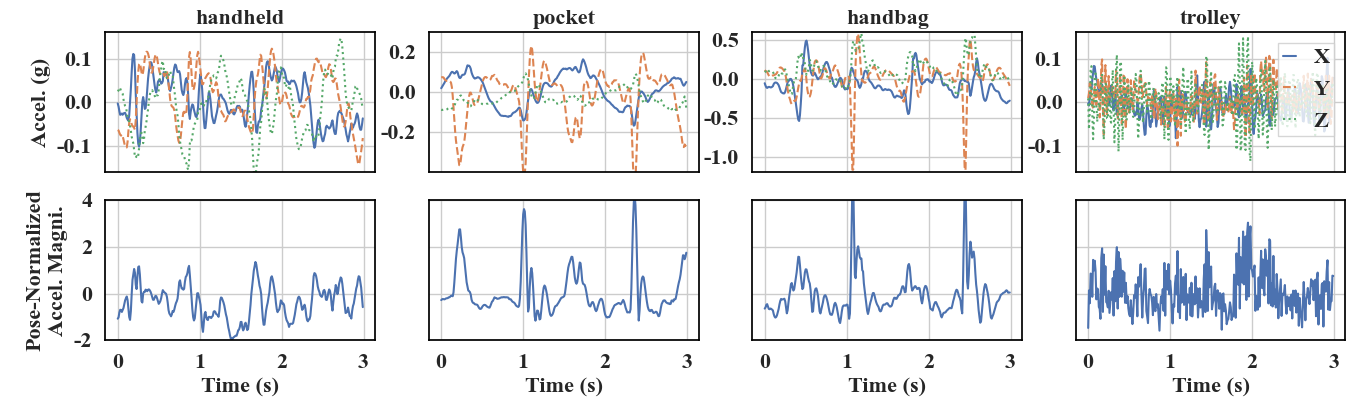

In [35]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 300
ylims = [(-0.16, 0.16), (-0.4, 0.3), (-1.2, 0.6), (-0.16, 0.16)]
yticks = [(-0.1, 0, 0.1), (-0.2, 0, 0.2), (-1, -0.5, 0, 0.5), (-0.1, 0, 0.1)]
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, i):
    df['timeid'] = np.arange(len(df))
    # acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    
    plt.subplot(2, 4, i+1)
    plt.plot(time_x, plot_df['AccX'], '-', label='AccX')
    plt.plot(time_x, plot_df['AccY'], '--', label='AccY')
    plt.plot(time_x, plot_df['AccZ'], ':', label='AccZ')
    
    plt.title(domain, fontdict=fontdict)
    if i==0 :
        plt.ylabel('\nAccel. (g)', fontdict=fontdict)
        plt.yticks(yticks[i]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        # plt.yticks([-1, 0, 1], labels=[''] * 3) # 
        plt.yticks(yticks[i])
    plt.ylim(ylims[i])
    plt.xticks(range((end_ind-start_ind)//100+1), labels=[''] * ((end_ind-start_ind)//100+1)) #
    if i==3:
        plt.legend(['X', 'Y', 'Z'], loc='upper right', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2) 
    
    plt.subplot(2, 4, i+5)
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    if i==0:
        plt.ylabel('Pose-Normalized\nAccel. Magni.', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
    
    plt.xlabel('Time (s)', fontdict=fontdict)
    plt.xticks(range((end_ind-start_ind)//100+1)) # , labels=[''] * 5
    plt.ylim([-2.0, 4.0])
    

plt.figure(8, [16, 4])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plot_imu(df, domain, i)
# save_pltfig(f'figures/imu_acc_accm')
plt.show()

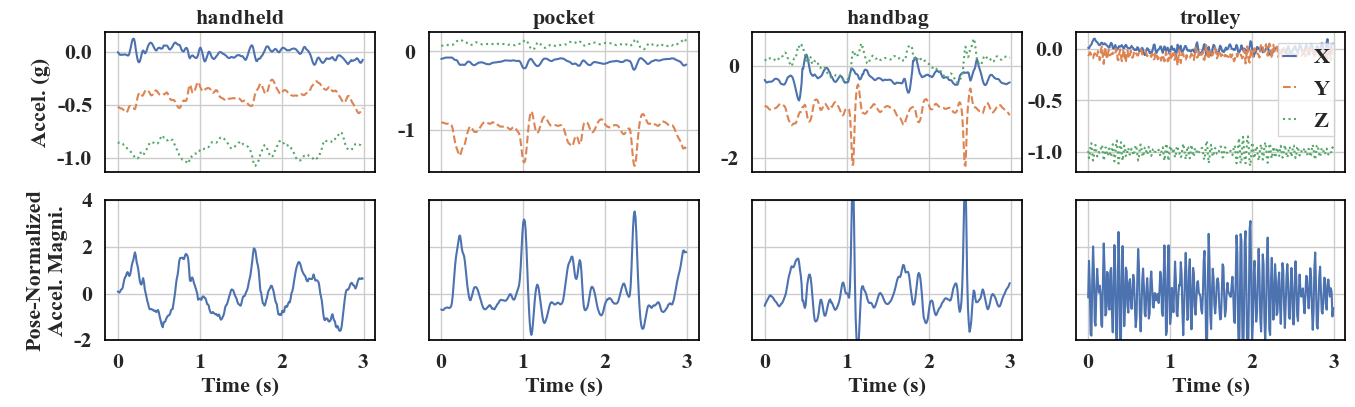

In [4]:
for df in dfs:
    df['GraAccX'] = df['AccX'] + df['GraX']
    df['GraAccY'] = df['AccY'] + df['GraY']
    df['GraAccZ'] = df['AccZ'] + df['GraZ']


fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 300
ylims = [(-0.16, 0.16), (-0.4, 0.3), (-1.2, 0.6), (-0.16, 0.16)]
yticks = [(-0.1, 0, 0.1), (-0.2, 0, 0.2), (-1, -0.5, 0, 0.5), (-0.1, 0, 0.1)]
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, i):
    df['timeid'] = np.arange(len(df))
    # acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    acc_np = df[['GraAccX', 'GraAccY', 'GraAccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    
    plt.subplot(2, 4, i+1)
    plt.plot(time_x, plot_df['GraAccX'], '-', label='AccX')
    plt.plot(time_x, plot_df['GraAccY'], '--', label='AccY')
    plt.plot(time_x, plot_df['GraAccZ'], ':', label='AccZ')
    
    plt.title(domain, fontdict=fontdict)
    if i==0 :
        plt.ylabel('\nAccel. (g)', fontdict=fontdict)
        # plt.yticks(yticks[i]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        # plt.yticks([-1, 0, 1], labels=[''] * 3) # 
        # plt.yticks(yticks[i])
    # plt.ylim(ylims[i])
    plt.xticks(range((end_ind-start_ind)//100+1), labels=[''] * ((end_ind-start_ind)//100+1)) #
    if i==3:
        plt.legend(['X', 'Y', 'Z'], loc='upper right', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2) 
    
    plt.subplot(2, 4, i+5)
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    if i==0:
        plt.ylabel('Pose-Normalized\nAccel. Magni.', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
    
    plt.xlabel('Time (s)', fontdict=fontdict)
    plt.xticks(range((end_ind-start_ind)//100+1)) # , labels=[''] * 5
    plt.ylim([-2.0, 4.0])
    

plt.figure(8, [16, 4])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plot_imu(df, domain, i)
save_pltfig(f'figures/imu_acc_accm')
plt.show()

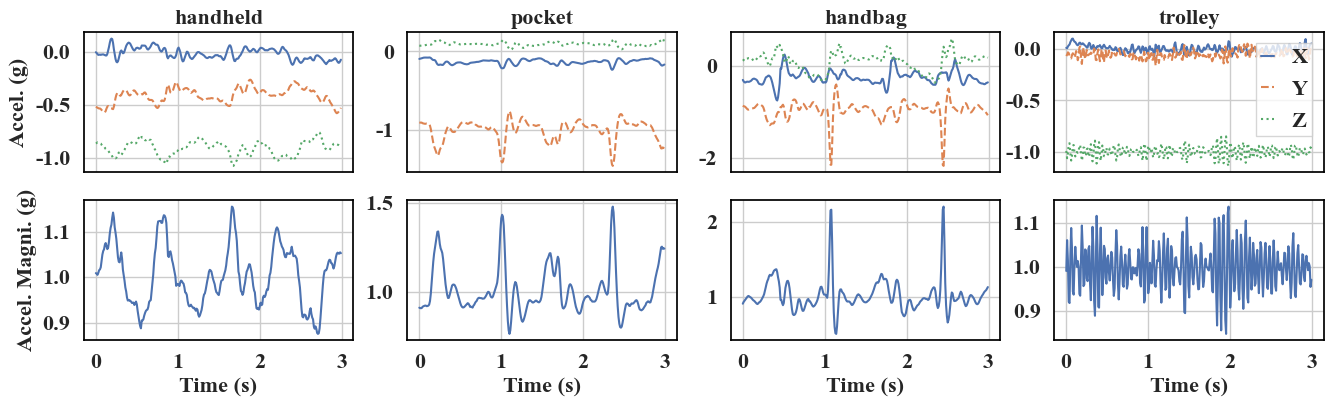

In [48]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 300
ylims = [(-0.16, 0.16), (-0.4, 0.3), (-1.2, 0.6), (-0.16, 0.16)]
yticks = [(-0.1, 0, 0.1), (-0.2, 0, 0.2), (-1, -0.5, 0, 0.5), (-0.1, 0, 0.1)]
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, i):
    df['timeid'] = np.arange(len(df))
    # acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    acc_np = df[['GraAccX', 'GraAccY', 'GraAccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)

    plot_df = df[start_ind:end_ind]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    
    plt.subplot(2, 4, i+1)
    plt.plot(time_x, plot_df['GraAccX'], '-', label='AccX')
    plt.plot(time_x, plot_df['GraAccY'], '--', label='AccY')
    plt.plot(time_x, plot_df['GraAccZ'], ':', label='AccZ')
    
    plt.title(domain, fontdict=fontdict)
    if i==0 :
        plt.ylabel('Accel. (g)', fontdict=fontdict)
        # plt.yticks(yticks[i]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        # plt.yticks([-1, 0, 1], labels=[''] * 3) # 
        # plt.yticks(yticks[i])
    # plt.ylim(ylims[i])
    plt.xticks(range((end_ind-start_ind)//100+1), labels=[''] * ((end_ind-start_ind)//100+1)) #
    if i==3:
        plt.legend(['X', 'Y', 'Z'], loc='upper right', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2) 
    
    plt.subplot(2, 4, i+5)
    plt.plot(time_x, plot_df['AccM'], label='(AccM-mu)/std')
    # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    if i==0:
        plt.ylabel('Accel. Magni. (g)', fontdict=fontdict)
        # plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        # plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
    
    plt.xlabel('Time (s)', fontdict=fontdict)
    plt.xticks(range((end_ind-start_ind)//100+1)) # , labels=[''] * 5
    # plt.ylim([-2.0, 4.0])
    

plt.figure(8, [16, 4])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plot_imu(df, domain, i)
# save_pltfig(f'figures/imu_acc_accm')
plt.show()